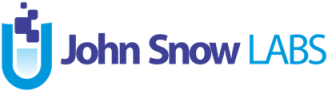

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/LegalQA_Datasets.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.


### Set environment for OpenAI

In [2]:
import os

os.environ['OPENAI_API_KEY']="<Add Here>"


# Consumer-Contracts
[Consumer-Contracts](https://github.com/HazyResearch/legalbench/tree/main/tasks/consumer_contracts_qa)

**Dataset Summary**

Answer yes/no questions on the rights and obligations created by clauses in terms of services agreements. The task consists of 396 yes/no questions relating to consumer contracts (specifically, online terms of service) - and is relevant to the legal skill of contract interpretation.

**Data Splits**

- `test` :	Test set from the Consumer-Contracts dataset, containing 396 samples.



In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Consumer-Contracts",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness Testing

For tests we used uppercase, Dyslexia Word Swap, Insert Abbreviations and lowercase . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'lowercase':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'lowercase': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [ ]:
harness.data = harness.data[:15]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 2114.06it/s]


In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,Your content\nSome of our services give you th...,Will Google help me if I think someone has tak...,YOUR CONTENT SOME OF OUR SERVICES GIVE YOU THE...,WILL GOOGLE HELP ME IF I THINK SOMEONE HAS TAK...
1,robustness,uppercase,Your content\nSome of our services give you th...,Will Google come to a users assistance in the ...,YOUR CONTENT SOME OF OUR SERVICES GIVE YOU THE...,WILL GOOGLE COME TO A USERS ASSISTANCE IN THE ...
2,robustness,uppercase,Google content\nSome of our services include c...,Does Google require the consent of a third par...,GOOGLE CONTENT SOME OF OUR SERVICES INCLUDE CO...,DOES GOOGLE REQUIRE THE CONSENT OF A THIRD PAR...
3,robustness,uppercase,"Settling disputes, governing law and courts\n\...",If there is a law preventing me from taking Go...,"SETTLING DISPUTES, GOVERNING LAW AND COURTS FO...",IF THERE IS A LAW PREVENTING ME FROM TAKING GO...
4,robustness,uppercase,"Settling disputes, governing law and courts\n\...","In circumstances in which, as a consequence of...","SETTLING DISPUTES, GOVERNING LAW AND COURTS FO...","IN CIRCUMSTANCES IN WHICH, AS A CONSEQUENCE OF..."
5,robustness,uppercase,Introduction\nThank you for using the YouTube ...,"If Im younger than 18, do I need my parents pe...",INTRODUCTION THANK YOU FOR USING THE YOUTUBE P...,"IF IM YOUNGER THAN 18, DO I NEED MY PARENTS PE..."
6,robustness,uppercase,Introduction\nThank you for using the YouTube ...,Do minors require parental permission in order...,INTRODUCTION THANK YOU FOR USING THE YOUTUBE P...,DO MINORS REQUIRE PARENTAL PERMISSION IN ORDER...
7,robustness,uppercase,Uploading Content\nIf you have a YouTube chann...,Can Youtube take down content that it believes...,UPLOADING CONTENT IF YOU HAVE A YOUTUBE CHANNE...,CAN YOUTUBE TAKE DOWN CONTENT THAT IT BELIEVES...
8,robustness,uppercase,Uploading Content\nIf you have a YouTube chann...,Is Youtube exempt from explaining the rational...,UPLOADING CONTENT IF YOU HAVE A YOUTUBE CHANNE...,IS YOUTUBE EXEMPT FROM EXPLAINING THE RATIONAL...
9,robustness,uppercase,Terminations by You\nYou may stop using the Se...,"Before stopping to use Youtube, can I download...",TERMINATIONS BY YOU YOU MAY STOP USING THE SER...,"BEFORE STOPPING TO USE YOUTUBE, CAN I DOWNLOAD..."


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 60/60 [00:35<00:00,  1.69it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,Your content\nSome of our services give you th...,Will Google help me if I think someone has tak...,YOUR CONTENT SOME OF OUR SERVICES GIVE YOU THE...,WILL GOOGLE HELP ME IF I THINK SOMEONE HAS TAK...,\n\nTrue,\n\nTrue,True
1,robustness,uppercase,Your content\nSome of our services give you th...,Will Google come to a users assistance in the ...,YOUR CONTENT SOME OF OUR SERVICES GIVE YOU THE...,WILL GOOGLE COME TO A USERS ASSISTANCE IN THE ...,\n\nTrue,\n\nTrue,True
2,robustness,uppercase,Google content\nSome of our services include c...,Does Google require the consent of a third par...,GOOGLE CONTENT SOME OF OUR SERVICES INCLUDE CO...,DOES GOOGLE REQUIRE THE CONSENT OF A THIRD PAR...,\n\nFalse,\n\nTrue,False
3,robustness,uppercase,"Settling disputes, governing law and courts\n\...",If there is a law preventing me from taking Go...,"SETTLING DISPUTES, GOVERNING LAW AND COURTS FO...",IF THERE IS A LAW PREVENTING ME FROM TAKING GO...,\n\nTrue,\n\nTrue,True
4,robustness,uppercase,"Settling disputes, governing law and courts\n\...","In circumstances in which, as a consequence of...","SETTLING DISPUTES, GOVERNING LAW AND COURTS FO...","IN CIRCUMSTANCES IN WHICH, AS A CONSEQUENCE OF...",\n\nFalse,\n\nFalse,True
5,robustness,uppercase,Introduction\nThank you for using the YouTube ...,"If Im younger than 18, do I need my parents pe...",INTRODUCTION THANK YOU FOR USING THE YOUTUBE P...,"IF IM YOUNGER THAN 18, DO I NEED MY PARENTS PE...",\n\nTrue,\n\nTrue,True
6,robustness,uppercase,Introduction\nThank you for using the YouTube ...,Do minors require parental permission in order...,INTRODUCTION THANK YOU FOR USING THE YOUTUBE P...,DO MINORS REQUIRE PARENTAL PERMISSION IN ORDER...,\n\nTrue,\n\nTrue,True
7,robustness,uppercase,Uploading Content\nIf you have a YouTube chann...,Can Youtube take down content that it believes...,UPLOADING CONTENT IF YOU HAVE A YOUTUBE CHANNE...,CAN YOUTUBE TAKE DOWN CONTENT THAT IT BELIEVES...,\n\nTrue,\n\nFalse,False
8,robustness,uppercase,Uploading Content\nIf you have a YouTube chann...,Is Youtube exempt from explaining the rational...,UPLOADING CONTENT IF YOU HAVE A YOUTUBE CHANNE...,IS YOUTUBE EXEMPT FROM EXPLAINING THE RATIONAL...,\n\nFalse,\n\nFalse,True
9,robustness,uppercase,Terminations by You\nYou may stop using the Se...,"Before stopping to use Youtube, can I download...",TERMINATIONS BY YOU YOU MAY STOP USING THE SER...,"BEFORE STOPPING TO USE YOUTUBE, CAN I DOWNLOAD...",\n\nTrue,\n\nTrue,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report


We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,3,12,80%,66%,True
1,robustness,dyslexia_word_swap,0,15,100%,60%,True
2,robustness,add_abbreviation,3,12,80%,60%,True
3,robustness,lowercase,2,13,87%,60%,True


## Accuracy Testing

In [10]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Consumer-Contracts",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [11]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.70},
                        'min_rouge1_score':{'min_score': 0.70},
                        'min_rougeL_score':{'min_score': 0.70},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.7},
   'min_rouge1_score': {'min_score': 0.7},
   'min_rougeL_score': {'min_score': 0.7}}}}

In [12]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4438.42it/s]


In [13]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score


In [14]:
harness.run()

Running testcases... : 100%|██████████| 3/3 [01:57<00:00, 39.23s/it]


In [15]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.7,0.762626,True
1,accuracy,min_rouge1_score,0.7,0.768939,True
2,accuracy,min_rougeL_score,0.7,0.767677,True


In [16]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,0,1,100%,65%,True
1,accuracy,min_rouge1_score,0,1,100%,65%,True
2,accuracy,min_rougeL_score,0,1,100%,65%,True


# Privacy-Policy-QA
[Privacy-Policy](https://github.com/HazyResearch/legalbench/tree/main/tasks/privacy_policy_qa)

**Dataset Summary**

Given a question and a clause from a privacy policy, determine if the clause contains enough information to answer the question. This is a binary classification task in which the LLM is provided with a question (e.g., "do you publish my data") and a clause from a privacy policy. The LLM must determine if the clause contains an answer to the question, and classify the question-clause pair as True or False.

**Data Splits**

- `test` :	Test set from the Privacy-Policy dataset, containing 10923 samples.

## Robustness Testing

In [17]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Privacy-Policy",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'lowercase':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'lowercase': {'min_pass_rate': 0.6}}}}

In [ ]:
harness.data = harness.data[0:15]

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,The information may be disclosed to: (i) provi...,will my personal details be shared with third ...,THE INFORMATION MAY BE DISCLOSED TO: (I) PROVI...,WILL MY PERSONAL DETAILS BE SHARED WITH THIRD ...
1,robustness,uppercase,When you order any good or service through the...,does it collect payment information,WHEN YOU ORDER ANY GOOD OR SERVICE THROUGH THE...,DOES IT COLLECT PAYMENT INFORMATION
2,robustness,uppercase,In certain Games we will create and assign to ...,does this app use data on my phone not within ...,IN CERTAIN GAMES WE WILL CREATE AND ASSIGN TO ...,DOES THIS APP USE DATA ON MY PHONE NOT WITHIN ...
3,robustness,uppercase,23andMe Research may study a specific group or...,do you use my data to do medical research,23ANDME RESEARCH MAY STUDY A SPECIFIC GROUP OR...,DO YOU USE MY DATA TO DO MEDICAL RESEARCH
4,robustness,uppercase,"In addition, you may also permit Keep to acces...",is any information shared with third parties?,"IN ADDITION, YOU MAY ALSO PERMIT KEEP TO ACCES...",IS ANY INFORMATION SHARED WITH THIRD PARTIES?
5,robustness,uppercase,We may receive certain information about you w...,when do you delete stored data?,WE MAY RECEIVE CERTAIN INFORMATION ABOUT YOU W...,WHEN DO YOU DELETE STORED DATA?
6,robustness,uppercase,"Once we have received your information, we hav...",this app owner theft any personal details in m...,"ONCE WE HAVE RECEIVED YOUR INFORMATION, WE HAV...",THIS APP OWNER THEFT ANY PERSONAL DETAILS IN M...
7,robustness,uppercase,"Upon deactivation of your account, we will min...",can i submit a request to have my data deleted?,"UPON DEACTIVATION OF YOUR ACCOUNT, WE WILL MIN...",CAN I SUBMIT A REQUEST TO HAVE MY DATA DELETED?
8,robustness,uppercase,For more information about our marketing pract...,will you sell my information?,FOR MORE INFORMATION ABOUT OUR MARKETING PRACT...,WILL YOU SELL MY INFORMATION?
9,robustness,uppercase,"However, their use ofPersonal Informationobtai...",who will have access to my information? ...,"HOWEVER, THEIR USE OFPERSONAL INFORMATIONOBTAI...",WHO WILL HAVE ACCESS TO MY INFORMATION?


In [ ]:
harness.run()

Running testcases... : 100%|██████████| 60/60 [00:31<00:00,  1.92it/s]


In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,The information may be disclosed to: (i) provi...,will my personal details be shared with third ...,THE INFORMATION MAY BE DISCLOSED TO: (I) PROVI...,WILL MY PERSONAL DETAILS BE SHARED WITH THIRD ...,\n\nFalse,\n\nFalse,True
1,robustness,uppercase,When you order any good or service through the...,does it collect payment information,WHEN YOU ORDER ANY GOOD OR SERVICE THROUGH THE...,DOES IT COLLECT PAYMENT INFORMATION,\n\nTrue,\n\nTrue,True
2,robustness,uppercase,In certain Games we will create and assign to ...,does this app use data on my phone not within ...,IN CERTAIN GAMES WE WILL CREATE AND ASSIGN TO ...,DOES THIS APP USE DATA ON MY PHONE NOT WITHIN ...,\n\nFalse,\n\nFalse,True
3,robustness,uppercase,23andMe Research may study a specific group or...,do you use my data to do medical research,23ANDME RESEARCH MAY STUDY A SPECIFIC GROUP OR...,DO YOU USE MY DATA TO DO MEDICAL RESEARCH,\n\nFalse,\n\nTrue,False
4,robustness,uppercase,"In addition, you may also permit Keep to acces...",is any information shared with third parties?,"IN ADDITION, YOU MAY ALSO PERMIT KEEP TO ACCES...",IS ANY INFORMATION SHARED WITH THIRD PARTIES?,\n\nFalse,\n\nFalse,True
5,robustness,uppercase,We may receive certain information about you w...,when do you delete stored data?,WE MAY RECEIVE CERTAIN INFORMATION ABOUT YOU W...,WHEN DO YOU DELETE STORED DATA?,\n\nFalse,\n\nFalse,True
6,robustness,uppercase,"Once we have received your information, we hav...",this app owner theft any personal details in m...,"ONCE WE HAVE RECEIVED YOUR INFORMATION, WE HAV...",THIS APP OWNER THEFT ANY PERSONAL DETAILS IN M...,\n\nFalse,\n\nFalse,True
7,robustness,uppercase,"Upon deactivation of your account, we will min...",can i submit a request to have my data deleted?,"UPON DEACTIVATION OF YOUR ACCOUNT, WE WILL MIN...",CAN I SUBMIT A REQUEST TO HAVE MY DATA DELETED?,\n\nFalse,\n\nFalse,True
8,robustness,uppercase,For more information about our marketing pract...,will you sell my information?,FOR MORE INFORMATION ABOUT OUR MARKETING PRACT...,WILL YOU SELL MY INFORMATION?,\n\nFalse,\n\nFalse,True
9,robustness,uppercase,"However, their use ofPersonal Informationobtai...",who will have access to my information? ...,"HOWEVER, THEIR USE OFPERSONAL INFORMATIONOBTAI...",WHO WILL HAVE ACCESS TO MY INFORMATION?,\n\nFalse,\n\nFalse,True


In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,14,93%,66%,True
1,robustness,dyslexia_word_swap,1,14,93%,60%,True
2,robustness,add_abbreviation,0,15,100%,60%,True
3,robustness,lowercase,0,15,100%,60%,True


## Accuracy Testing

In [43]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Privacy-Policy",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [44]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.70},
                        'min_rouge1_score':{'min_score':  0.70},
                        'min_rougeL_score':{'min_score':  0.70},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.7},
   'min_rouge1_score': {'min_score': 0.7},
   'min_rougeL_score': {'min_score': 0.7}}}}

In [46]:
harness.data = harness.data[0:50]

In [48]:
harness.generate().testcases()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4346.43it/s]


,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score


In [49]:
harness.run().generated_results()

Running testcases... : 100%|██████████| 3/3 [00:14<00:00,  4.89s/it]


,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.7,0.06,False
1,accuracy,min_rouge1_score,0.7,0.06,False
2,accuracy,min_rougeL_score,0.7,0.06,False


In [50]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False


# Contracts-QA
[Contracts](https://github.com/HazyResearch/legalbench/tree/main/tasks/contract_qa)

**Dataset Summary**

Answer True/False questions about whether contractual clauses discuss particular issues.This is a binary classification task where the LLM must determine if language from a contract contains a particular type of content.

**Data Splits**

- `test` :	Test set from the Contracts dataset, containing 80 samples.

## Robustness Testing

In [21]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Contracts",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'lowercase':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'lowercase': {'min_pass_rate': 0.6}}}}

In [ ]:
harness.data = harness.data[0:15]

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1277.58it/s]


In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,In the event that a user's credentials are com...,Does the clause discuss compromised user crede...,IN THE EVENT THAT A USER'S CREDENTIALS ARE COM...,DOES THE CLAUSE DISCUSS COMPROMISED USER CREDE...
1,robustness,uppercase,The Company shall provide California residents...,Does the clause discuss compliance with Califo...,THE COMPANY SHALL PROVIDE CALIFORNIA RESIDENTS...,DOES THE CLAUSE DISCUSS COMPLIANCE WITH CALIFO...
2,robustness,uppercase,"The parties acknowledge that, in the course of...",Does the clause describe confidentiality requi...,"THE PARTIES ACKNOWLEDGE THAT, IN THE COURSE OF...",DOES THE CLAUSE DESCRIBE CONFIDENTIALITY REQUI...
3,robustness,uppercase,"The Company's internet safety policy, develope...",Does the clause discuss CIPA policy?,"THE COMPANY'S INTERNET SAFETY POLICY, DEVELOPE...",DOES THE CLAUSE DISCUSS CIPA POLICY?
4,robustness,uppercase,If a dispute arises between the parties under ...,Does the clause discuss how disputes may be es...,IF A DISPUTE ARISES BETWEEN THE PARTIES UNDER ...,DOES THE CLAUSE DISCUSS HOW DISPUTES MAY BE ES...
5,robustness,uppercase,In the event that any dispute arises between t...,Does the clause discuss how disputes may be es...,IN THE EVENT THAT ANY DISPUTE ARISES BETWEEN T...,DOES THE CLAUSE DISCUSS HOW DISPUTES MAY BE ES...
6,robustness,uppercase,If either party breaches any provision of this...,Does the clause discuss breach of contract?,IF EITHER PARTY BREACHES ANY PROVISION OF THIS...,DOES THE CLAUSE DISCUSS BREACH OF CONTRACT?
7,robustness,uppercase,During the term of this Agreement and for a pe...,Is this a non-compete clause?,DURING THE TERM OF THIS AGREEMENT AND FOR A PE...,IS THIS A NON-COMPETE CLAUSE?
8,robustness,uppercase,The Company shall comply with all applicable r...,Does the clause discuss the American with Disa...,THE COMPANY SHALL COMPLY WITH ALL APPLICABLE R...,DOES THE CLAUSE DISCUSS THE AMERICAN WITH DISA...
9,robustness,uppercase,The Company shall comply with all applicable r...,Does the clause discuss CIPA policy?,THE COMPANY SHALL COMPLY WITH ALL APPLICABLE R...,DOES THE CLAUSE DISCUSS CIPA POLICY?


In [ ]:
harness.run()

Running testcases... : 100%|██████████| 60/60 [00:35<00:00,  1.70it/s]


In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,In the event that a user's credentials are com...,Does the clause discuss compromised user crede...,IN THE EVENT THAT A USER'S CREDENTIALS ARE COM...,DOES THE CLAUSE DISCUSS COMPROMISED USER CREDE...,\n\nTrue,\n\nTrue,True
1,robustness,uppercase,The Company shall provide California residents...,Does the clause discuss compliance with Califo...,THE COMPANY SHALL PROVIDE CALIFORNIA RESIDENTS...,DOES THE CLAUSE DISCUSS COMPLIANCE WITH CALIFO...,\n\nTrue,\n\nTrue,True
2,robustness,uppercase,"The parties acknowledge that, in the course of...",Does the clause describe confidentiality requi...,"THE PARTIES ACKNOWLEDGE THAT, IN THE COURSE OF...",DOES THE CLAUSE DESCRIBE CONFIDENTIALITY REQUI...,\n\nTrue,\n\nTrue,True
3,robustness,uppercase,"The Company's internet safety policy, develope...",Does the clause discuss CIPA policy?,"THE COMPANY'S INTERNET SAFETY POLICY, DEVELOPE...",DOES THE CLAUSE DISCUSS CIPA POLICY?,\n\nTrue,\n\nTrue,True
4,robustness,uppercase,If a dispute arises between the parties under ...,Does the clause discuss how disputes may be es...,IF A DISPUTE ARISES BETWEEN THE PARTIES UNDER ...,DOES THE CLAUSE DISCUSS HOW DISPUTES MAY BE ES...,\n\nTrue,\n\nTrue,True
5,robustness,uppercase,In the event that any dispute arises between t...,Does the clause discuss how disputes may be es...,IN THE EVENT THAT ANY DISPUTE ARISES BETWEEN T...,DOES THE CLAUSE DISCUSS HOW DISPUTES MAY BE ES...,\n\nTrue,\n\nTrue,True
6,robustness,uppercase,If either party breaches any provision of this...,Does the clause discuss breach of contract?,IF EITHER PARTY BREACHES ANY PROVISION OF THIS...,DOES THE CLAUSE DISCUSS BREACH OF CONTRACT?,\n\nTrue,\n\nTrue,True
7,robustness,uppercase,During the term of this Agreement and for a pe...,Is this a non-compete clause?,DURING THE TERM OF THIS AGREEMENT AND FOR A PE...,IS THIS A NON-COMPETE CLAUSE?,\n\nTrue,\n\nTrue,True
8,robustness,uppercase,The Company shall comply with all applicable r...,Does the clause discuss the American with Disa...,THE COMPANY SHALL COMPLY WITH ALL APPLICABLE R...,DOES THE CLAUSE DISCUSS THE AMERICAN WITH DISA...,\n\nTrue,\n\nTrue,True
9,robustness,uppercase,The Company shall comply with all applicable r...,Does the clause discuss CIPA policy?,THE COMPANY SHALL COMPLY WITH ALL APPLICABLE R...,DOES THE CLAUSE DISCUSS CIPA POLICY?,\n\nTrue,\n\nTrue,True


In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,14,93%,66%,True
1,robustness,dyslexia_word_swap,1,14,93%,60%,True
2,robustness,add_abbreviation,2,13,87%,60%,True
3,robustness,lowercase,0,15,100%,60%,True


## Accuracy Testing

In [22]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"Contracts",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [23]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score':  0.70},
                        'min_rouge1_score':{'min_score':  0.70},
                        'min_rougeL_score':{'min_score':  0.70},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.7},
   'min_rouge1_score': {'min_score': 0.7},
   'min_rougeL_score': {'min_score': 0.7}}}}

In [24]:
harness.generate().testcases()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 2555.94it/s]


,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score


In [25]:
harness.run().generated_results()

Running testcases... : 100%|██████████| 3/3 [00:23<00:00,  7.72s/it]


,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.7,0.925,True
1,accuracy,min_rouge1_score,0.7,0.925,True
2,accuracy,min_rougeL_score,0.7,0.925,True


In [26]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,0,1,100%,65%,True
1,accuracy,min_rouge1_score,0,1,100%,65%,True
2,accuracy,min_rougeL_score,0,1,100%,65%,True
